In [1]:
import lumicks.pylake as lk

In [2]:
import pandas as pd

In [3]:
import numpy as np
import matplotlib.pyplot as plt

In [221]:
#DNA1 Condition 2 (Excess Rad51 on 11-12-2024)

In [222]:
file = lk.File("20241112-155654 Kymograph C2_DNA1_Kymo.h5")

In [223]:
print(file)

File root metadata:
- Bluelake version: 2.5.3
- Description: 
- Experiment: 
- Export time (ns): 1731451851722289000
- File format version: 2
- GUID: {F1EE9D4C-7DD3-45D2-AB12-843296E25F8F}

Bead position:
  Bead 1 X:
  - Data type: [('Timestamp', '<i8'), ('Value', '<f8')]
  - Size: 2264
  Bead 1 Y:
  - Data type: [('Timestamp', '<i8'), ('Value', '<f8')]
  - Size: 2264
  Bead 2 X:
  - Data type: [('Timestamp', '<i8'), ('Value', '<f8')]
  - Size: 2264
  Bead 2 Y:
  - Data type: [('Timestamp', '<i8'), ('Value', '<f8')]
  - Size: 2264
Confocal diagnostics:
  Excitation Laser Blue:
  - Data type: [('Timestamp', '<i8'), ('Value', '<f8')]
  - Size: 3
  Excitation Laser Green:
  - Data type: [('Timestamp', '<i8'), ('Value', '<f8')]
  - Size: 3
  Excitation Laser Red:
  - Data type: [('Timestamp', '<i8'), ('Value', '<f8')]
  - Size: 6
Distance:
  Distance 1:
  - Data type: [('Timestamp', '<i8'), ('Value', '<f8')]
  - Size: 2264
Force HF:
  Force 1x:
  - Data type: float64
  - Size: 11785001
  F

In [224]:
print(file.kymos)

{'C2_DNA1_Kymo': Kymo(pixels=74)}


In [225]:
for name, kymo in file.kymos.items():
    print(f"kymograph '{name}', starts at {kymo.start} ns")

kymograph 'C2_DNA1_Kymo', starts at 1731448614602301800 ns


In [226]:
rgb = kymo.get_image("rgb")

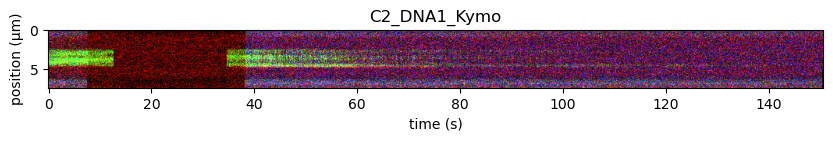

In [227]:
f = plt.figure()
f.set_figwidth(10)
f.set_figheight(8)
kymo_new = kymo["0s":"160s"].plot("rgb", adjustment=lk.ColorAdjustment(0, 99, mode="percentile"))
plt.show()

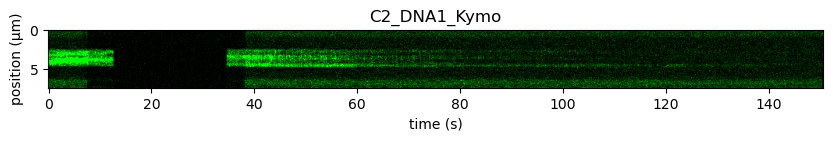

In [228]:
f = plt.figure()
f.set_figwidth(10)
f.set_figheight(8)
kymo_new = kymo["0s":"160s"].plot("g", adjustment=lk.ColorAdjustment(0, 99, mode="percentile"))
plt.show()

In [229]:
#Trying background correction

In [230]:
background = kymo["40s":"60s"].crop_by_distance(5.0, 5.1)
green_background_per_pixel = np.sum(background.get_image("green"))

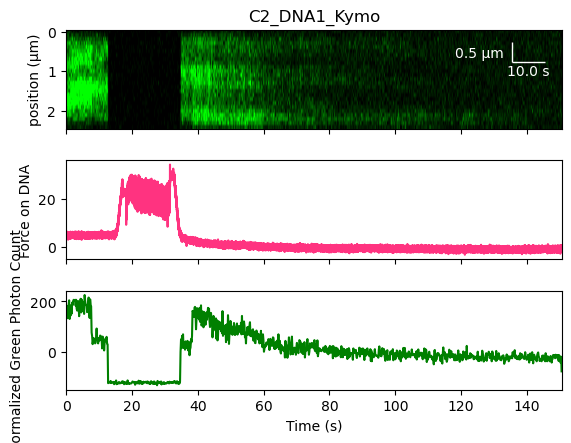

In [231]:
# Calculate background-subtracted photon count
background_subtracted_photon_count = file["Photon count"]["Green"].downsampled_over(kymo.line_timestamp_ranges(), reduce=np.sum) - green_background_per_pixel

# Plot the background-subtracted photon count
kymo.crop_by_distance(2.4, 4.8).plot_with_channels(
    [
        file.force2x.downsampled_by(100),
        background_subtracted_photon_count,
    ],
    "g",
    adjustment=lk.ColorAdjustment(0, 98, "percentile"),
    aspect_ratio=0.2,
    title_vertical=True,
    scale_bar=lk.ScaleBar(10.0, 0.5),
    colors=[[1.0, 0.2, 0.5], "green"],
    labels=["Force on DNA", "Normalized Green Photon Count"],
)
time_counts =background_subtracted_photon_count.timestamps
time_counts = (time_counts - time_counts[0]) *1e-9
photon_counts=background_subtracted_photon_count.data
counts= np.vstack((time_counts,photon_counts)).T
np.savetxt('C2_DNA1_Green_counts.csv',counts, delimiter=',', header='time counts')
#plt.savefig('DNA1_Condition2_GreenCount.png')

In [211]:
#####DNA2 Condition 2

In [212]:
file = lk.File("20241112-160656 Kymograph C2_DNA2_Kymo.h5")

In [213]:
print(file)

File root metadata:
- Bluelake version: 2.5.3
- Description: 
- Experiment: 
- Export time (ns): 1731451851754289000
- File format version: 2
- GUID: {0D728533-956F-47AA-B990-7E198C2CB284}

Bead position:
  Bead 1 X:
  - Data type: [('Timestamp', '<i8'), ('Value', '<f8')]
  - Size: 2335
  Bead 1 Y:
  - Data type: [('Timestamp', '<i8'), ('Value', '<f8')]
  - Size: 2335
  Bead 2 X:
  - Data type: [('Timestamp', '<i8'), ('Value', '<f8')]
  - Size: 2335
  Bead 2 Y:
  - Data type: [('Timestamp', '<i8'), ('Value', '<f8')]
  - Size: 2335
Confocal diagnostics:
  Excitation Laser Blue:
  - Data type: [('Timestamp', '<i8'), ('Value', '<f8')]
  - Size: 3
  Excitation Laser Green:
  - Data type: [('Timestamp', '<i8'), ('Value', '<f8')]
  - Size: 3
  Excitation Laser Red:
  - Data type: [('Timestamp', '<i8'), ('Value', '<f8')]
  - Size: 5
Distance:
  Distance 1:
  - Data type: [('Timestamp', '<i8'), ('Value', '<f8')]
  - Size: 2335
Force HF:
  Force 1x:
  - Data type: float64
  - Size: 12155001
  F

In [214]:
print(file.kymos)

{'C2_DNA2_Kymo': Kymo(pixels=83)}


In [215]:
for name, kymo in file.kymos.items():
    print(f"kymograph '{name}', starts at {kymo.start} ns")

kymograph 'C2_DNA2_Kymo', starts at 1731449216682301800 ns


In [216]:
rgb = kymo.get_image("rgb")

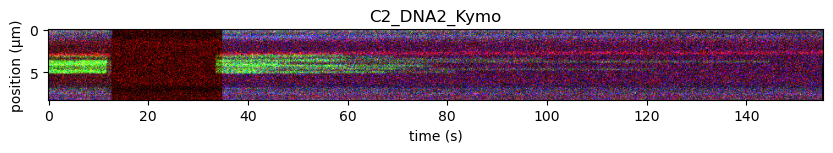

In [217]:
f = plt.figure()
f.set_figwidth(10)
f.set_figheight(8)
kymo_new = kymo["0s":"160s"].plot("rgb", adjustment=lk.ColorAdjustment(0, 99, mode="percentile"))
plt.show()

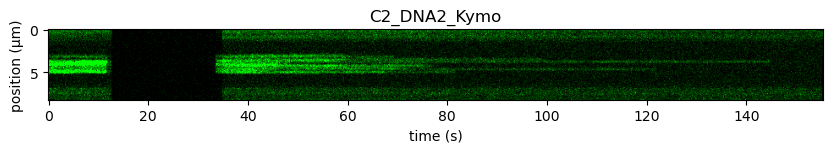

In [218]:
f = plt.figure()
f.set_figwidth(10)
f.set_figheight(8)
kymo_new = kymo["0s":"160s"].plot("g", adjustment=lk.ColorAdjustment(0, 99, mode="percentile"))
plt.show()

In [219]:
background = kymo["40s":"60s"].crop_by_distance(5.4, 5.5)
green_background_per_pixel = np.sum(background.get_image("green"))

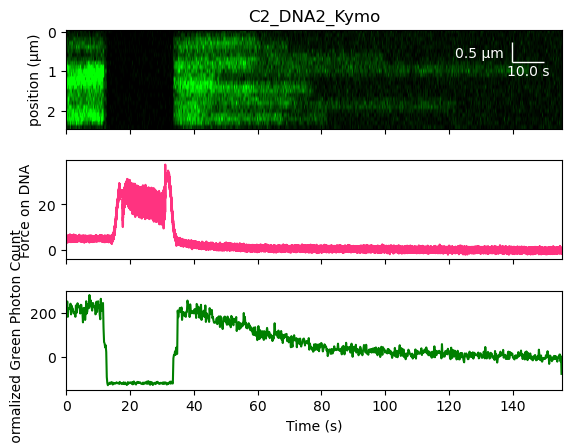

In [220]:
# Calculate background-subtracted photon count
background_subtracted_photon_count = file["Photon count"]["Green"].downsampled_over(kymo.line_timestamp_ranges(), reduce=np.sum) - green_background_per_pixel

# Plot the background-subtracted photon count
kymo.crop_by_distance(2.9, 5.3).plot_with_channels(
    [
        file.force2x.downsampled_by(100),
        background_subtracted_photon_count,
    ],
    "g",
    adjustment=lk.ColorAdjustment(0, 98, "percentile"),
    aspect_ratio=0.2,
    title_vertical=True,
    scale_bar=lk.ScaleBar(10.0, 0.5),
    colors=[[1.0, 0.2, 0.5], "green"],
    labels=["Force on DNA", "Normalized Green Photon Count"],
)
time_counts =background_subtracted_photon_count.timestamps
time_counts = (time_counts - time_counts[0]) *1e-9
photon_counts=background_subtracted_photon_count.data
counts= np.vstack((time_counts,photon_counts)).T
np.savetxt('C2_DNA2_Green_counts.csv',counts, delimiter=',', header='time counts')
#plt.savefig('DNA2_Condition2_GreenCount.png')

In [201]:
#C2 DNA3

In [202]:
file = lk.File("20241112-161609 Kymograph C2_DNA3_Kymo.h5")

In [203]:
print(file)

File root metadata:
- Bluelake version: 2.5.3
- Description: 
- Experiment: 
- Export time (ns): 1731451851786289000
- File format version: 2
- GUID: {BB319075-A07D-4773-A378-AEAD3A6ED30A}

Bead position:
  Bead 1 X:
  - Data type: [('Timestamp', '<i8'), ('Value', '<f8')]
  - Size: 1726
  Bead 1 Y:
  - Data type: [('Timestamp', '<i8'), ('Value', '<f8')]
  - Size: 1726
  Bead 2 X:
  - Data type: [('Timestamp', '<i8'), ('Value', '<f8')]
  - Size: 1726
  Bead 2 Y:
  - Data type: [('Timestamp', '<i8'), ('Value', '<f8')]
  - Size: 1726
Confocal diagnostics:
  Excitation Laser Blue:
  - Data type: [('Timestamp', '<i8'), ('Value', '<f8')]
  - Size: 3
  Excitation Laser Green:
  - Data type: [('Timestamp', '<i8'), ('Value', '<f8')]
  - Size: 3
  Excitation Laser Red:
  - Data type: [('Timestamp', '<i8'), ('Value', '<f8')]
  - Size: 3
Distance:
  Distance 1:
  - Data type: [('Timestamp', '<i8'), ('Value', '<f8')]
  - Size: 1726
Force HF:
  Force 1x:
  - Data type: float64
  - Size: 8980001
  Fo

In [204]:
print(file.kymos)

{'C2_DNA3_Kymo': Kymo(pixels=76)}


In [205]:
for name, kymo in file.kymos.items():
    print(f"kymograph '{name}', starts at {kymo.start} ns")

kymograph 'C2_DNA3_Kymo', starts at 1731449769866301800 ns


In [206]:
rgb = kymo.get_image("rgb")

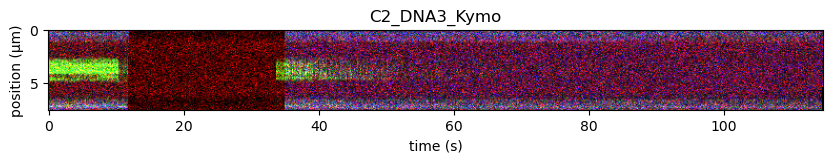

In [207]:
f = plt.figure()
f.set_figwidth(10)
f.set_figheight(8)
kymo_new = kymo["0s":"160s"].plot("rgb", adjustment=lk.ColorAdjustment(0, 99, mode="percentile"))
plt.show()

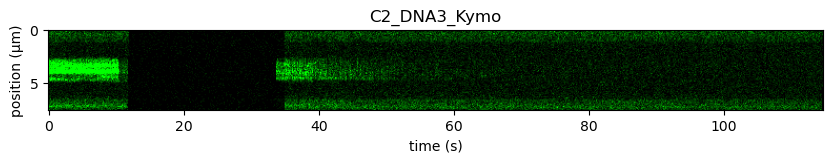

In [208]:
f = plt.figure()
f.set_figwidth(10)
f.set_figheight(8)
kymo_new = kymo["0s":"160s"].plot("g", adjustment=lk.ColorAdjustment(0, 99, mode="percentile"))
plt.show()

In [209]:
background = kymo["40s":"60s"].crop_by_distance(5.2, 5.3)
green_background_per_pixel = np.sum(background.get_image("green"))

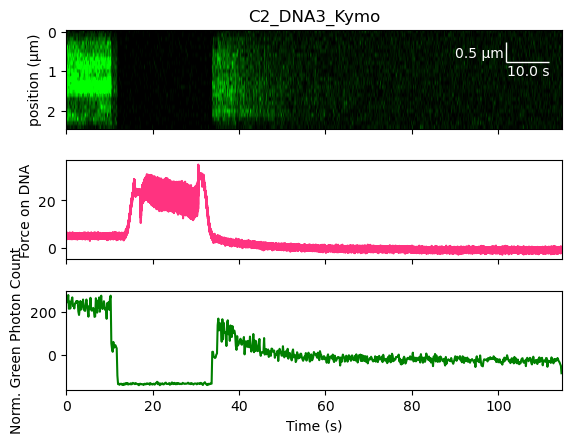

In [210]:
# Calculate background-subtracted photon count
background_subtracted_photon_count = file["Photon count"]["Green"].downsampled_over(kymo.line_timestamp_ranges(), reduce=np.sum) - green_background_per_pixel

# Plot the background-subtracted photon count
kymo.crop_by_distance(2.5, 5.0).plot_with_channels(
    [
        file.force2x.downsampled_by(100),
        background_subtracted_photon_count,
    ],
    "g",
    adjustment=lk.ColorAdjustment(0, 98, "percentile"),
    aspect_ratio=0.2,
    title_vertical=True,
    scale_bar=lk.ScaleBar(10.0, 0.5),
    colors=[[1.0, 0.2, 0.5], "green"],
    labels=["Force on DNA", "Norm. Green Photon Count"],
)
time_counts =background_subtracted_photon_count.timestamps
time_counts = (time_counts - time_counts[0]) *1e-9
photon_counts=background_subtracted_photon_count.data
counts= np.vstack((time_counts,photon_counts)).T
np.savetxt('C2_DNA3_Green_counts.csv',counts, delimiter=',', header='time counts')
#plt.savefig('DNA3_Condition2_GreenCount.png')

In [191]:
#DNA4 Condition 2

In [192]:
file = lk.File("20241112-162227 Kymograph C2_DNA4_Kymo.h5")

In [193]:
print(file)

File root metadata:
- Bluelake version: 2.5.3
- Description: 
- Experiment: 
- Export time (ns): 1731451851818289000
- File format version: 2
- GUID: {555F4928-926D-4C94-8C45-683DDA7EEEAF}

Bead position:
  Bead 1 X:
  - Data type: [('Timestamp', '<i8'), ('Value', '<f8')]
  - Size: 2126
  Bead 1 Y:
  - Data type: [('Timestamp', '<i8'), ('Value', '<f8')]
  - Size: 2126
  Bead 2 X:
  - Data type: [('Timestamp', '<i8'), ('Value', '<f8')]
  - Size: 2126
  Bead 2 Y:
  - Data type: [('Timestamp', '<i8'), ('Value', '<f8')]
  - Size: 2126
Confocal diagnostics:
  Excitation Laser Blue:
  - Data type: [('Timestamp', '<i8'), ('Value', '<f8')]
  - Size: 3
  Excitation Laser Green:
  - Data type: [('Timestamp', '<i8'), ('Value', '<f8')]
  - Size: 3
  Excitation Laser Red:
  - Data type: [('Timestamp', '<i8'), ('Value', '<f8')]
  - Size: 4
Distance:
  Distance 1:
  - Data type: [('Timestamp', '<i8'), ('Value', '<f8')]
  - Size: 2126
Force HF:
  Force 1x:
  - Data type: float64
  - Size: 11067501
  F

In [194]:
print(file.kymos)

{'C2_DNA4_Kymo': Kymo(pixels=81)}


In [195]:
for name, kymo in file.kymos.items():
    print(f"kymograph '{name}', starts at {kymo.start} ns")

kymograph 'C2_DNA4_Kymo', starts at 1731450147690301800 ns


In [196]:
rgb = kymo.get_image("rgb")

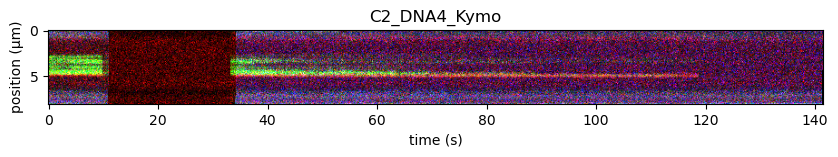

In [197]:
f = plt.figure()
f.set_figwidth(10)
f.set_figheight(8)
kymo_new = kymo["0s":"160s"].plot("rgb", adjustment=lk.ColorAdjustment(0, 99, mode="percentile"))
plt.show()

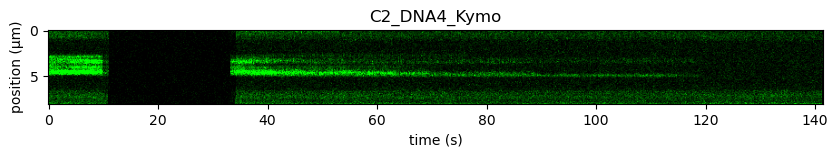

In [198]:
f = plt.figure()
f.set_figwidth(10)
f.set_figheight(8)
kymo_new = kymo["0s":"160s"].plot("g", adjustment=lk.ColorAdjustment(0, 99, mode="percentile"))
plt.show()

In [199]:
background = kymo["40s":"60s"].crop_by_distance(5.2, 5.3)
green_background_per_pixel = np.sum(background.get_image("green"))

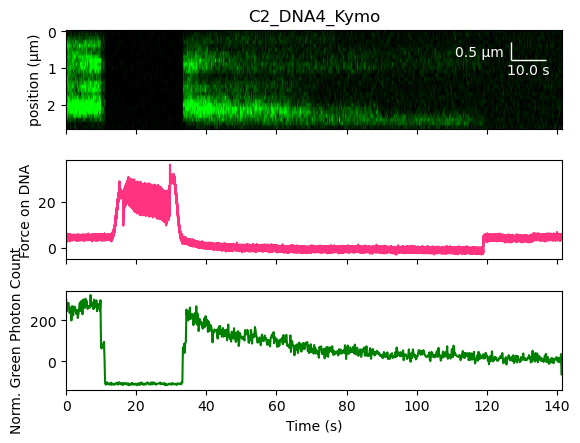

In [200]:
# Calculate background-subtracted photon count
background_subtracted_photon_count = file["Photon count"]["Green"].downsampled_over(kymo.line_timestamp_ranges(), reduce=np.sum) - green_background_per_pixel

# Plot the background-subtracted photon count
kymo.crop_by_distance(2.5, 5.2).plot_with_channels(
    [
        file.force2x.downsampled_by(100),
        background_subtracted_photon_count,
    ],
    "g",
    adjustment=lk.ColorAdjustment(0, 98, "percentile"),
    aspect_ratio=0.2,
    title_vertical=True,
    scale_bar=lk.ScaleBar(10.0, 0.5),
    colors=[[1.0, 0.2, 0.5], "green"],
    labels=["Force on DNA", "Norm. Green Photon Count"],
)
time_counts =background_subtracted_photon_count.timestamps
time_counts = (time_counts - time_counts[0]) *1e-9
photon_counts=background_subtracted_photon_count.data
counts= np.vstack((time_counts,photon_counts)).T
np.savetxt('C2_DNA4_Green_counts.csv',counts, delimiter=',', header='time counts')
#plt.savefig('DNA4_Condition2_GreenCount.png')

In [181]:
#C2 DNA5

In [182]:
file = lk.File("20241112-163018 Kymograph C2_DNA5_Kymo.h5")

In [183]:
print(file)

File root metadata:
- Bluelake version: 2.5.3
- Description: 
- Experiment: 
- Export time (ns): 1731451851850289000
- File format version: 2
- GUID: {6C774505-1AF1-423A-8ED6-E59AEC9F7206}

Bead position:
  Bead 1 X:
  - Data type: [('Timestamp', '<i8'), ('Value', '<f8')]
  - Size: 1761
  Bead 1 Y:
  - Data type: [('Timestamp', '<i8'), ('Value', '<f8')]
  - Size: 1761
  Bead 2 X:
  - Data type: [('Timestamp', '<i8'), ('Value', '<f8')]
  - Size: 1761
  Bead 2 Y:
  - Data type: [('Timestamp', '<i8'), ('Value', '<f8')]
  - Size: 1761
Confocal diagnostics:
  Excitation Laser Blue:
  - Data type: [('Timestamp', '<i8'), ('Value', '<f8')]
  - Size: 3
  Excitation Laser Green:
  - Data type: [('Timestamp', '<i8'), ('Value', '<f8')]
  - Size: 3
  Excitation Laser Red:
  - Data type: [('Timestamp', '<i8'), ('Value', '<f8')]
  - Size: 6
Distance:
  Distance 1:
  - Data type: [('Timestamp', '<i8'), ('Value', '<f8')]
  - Size: 1761
Force HF:
  Force 1x:
  - Data type: float64
  - Size: 9165001
  Fo

In [184]:
print(file.kymos)

{'C2_DNA5_Kymo': Kymo(pixels=73)}


In [185]:
for name, kymo in file.kymos.items():
    print(f"kymograph '{name}', starts at {kymo.start} ns")

kymograph 'C2_DNA5_Kymo', starts at 1731450618922301800 ns


In [186]:
rgb = kymo.get_image("rgb")

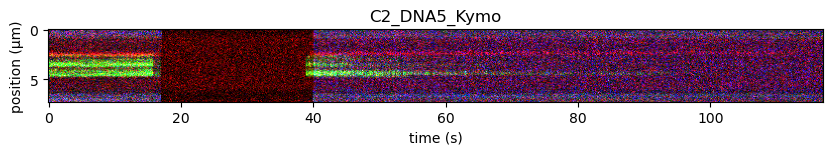

In [187]:
f = plt.figure()
f.set_figwidth(10)
f.set_figheight(8)
kymo_new = kymo["0s":"160s"].plot("rgb", adjustment=lk.ColorAdjustment(0, 99, mode="percentile"))
plt.show()

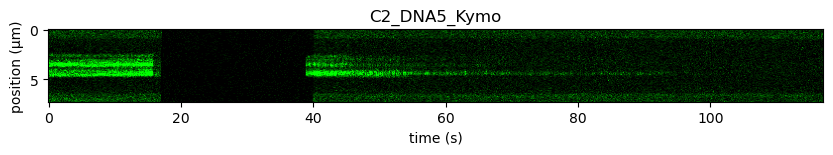

In [188]:
f = plt.figure()
f.set_figwidth(10)
f.set_figheight(8)
kymo_new = kymo["0s":"160s"].plot("g", adjustment=lk.ColorAdjustment(0, 99, mode="percentile"))
plt.show()

In [189]:
background = kymo["40s":"60s"].crop_by_distance(5.2, 5.3)
green_background_per_pixel = np.sum(background.get_image("green"))

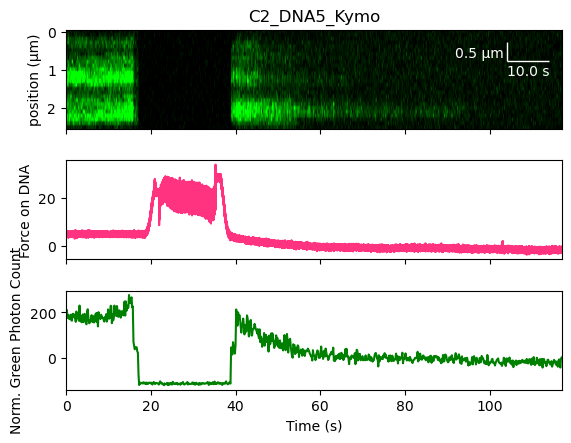

In [190]:
# Calculate background-subtracted photon count
background_subtracted_photon_count = file["Photon count"]["Green"].downsampled_over(kymo.line_timestamp_ranges(), reduce=np.sum) - green_background_per_pixel

# Plot the background-subtracted photon count
kymo.crop_by_distance(2.4, 4.9).plot_with_channels(
    [
        file.force2x.downsampled_by(100),
        background_subtracted_photon_count,
    ],
    "g",
    adjustment=lk.ColorAdjustment(0, 98, "percentile"),
    aspect_ratio=0.2,
    title_vertical=True,
    scale_bar=lk.ScaleBar(10.0, 0.5),
    colors=[[1.0, 0.2, 0.5], "green"],
    labels=["Force on DNA", "Norm. Green Photon Count"],
)
time_counts =background_subtracted_photon_count.timestamps
time_counts = (time_counts - time_counts[0]) *1e-9
photon_counts=background_subtracted_photon_count.data
counts= np.vstack((time_counts,photon_counts)).T
np.savetxt('C2_DNA5_Green_counts.csv',counts, delimiter=',', header='time counts')

#plt.savefig('DNA5_Condition2_GreenCount.png')

In [91]:
#Condition 2 DNA6

In [165]:
file = lk.File("20241112-164237 Kymograph C2_DNA6_Kymo.h5")

In [166]:
print(file)

File root metadata:
- Bluelake version: 2.5.3
- Description: 
- Experiment: 
- Export time (ns): 1731451851882289000
- File format version: 2
- GUID: {FAAFA3AD-4A04-41B8-A2B3-BC76EB741EC5}

Bead position:
  Bead 1 X:
  - Data type: [('Timestamp', '<i8'), ('Value', '<f8')]
  - Size: 1636
  Bead 1 Y:
  - Data type: [('Timestamp', '<i8'), ('Value', '<f8')]
  - Size: 1636
  Bead 2 X:
  - Data type: [('Timestamp', '<i8'), ('Value', '<f8')]
  - Size: 1636
  Bead 2 Y:
  - Data type: [('Timestamp', '<i8'), ('Value', '<f8')]
  - Size: 1636
Confocal diagnostics:
  Excitation Laser Blue:
  - Data type: [('Timestamp', '<i8'), ('Value', '<f8')]
  - Size: 3
  Excitation Laser Green:
  - Data type: [('Timestamp', '<i8'), ('Value', '<f8')]
  - Size: 3
  Excitation Laser Red:
  - Data type: [('Timestamp', '<i8'), ('Value', '<f8')]
  - Size: 3
Distance:
  Distance 1:
  - Data type: [('Timestamp', '<i8'), ('Value', '<f8')]
  - Size: 1636
Force HF:
  Force 1x:
  - Data type: float64
  - Size: 8512501
  Fo

In [167]:
print(file.kymos)

{'C2_DNA6_Kymo': Kymo(pixels=78)}


In [168]:
for name, kymo in file.kymos.items():
    print(f"kymograph '{name}', starts at {kymo.start} ns")

kymograph 'C2_DNA6_Kymo', starts at 1731451357098301800 ns


In [169]:
rgb = kymo.get_image("rgb")

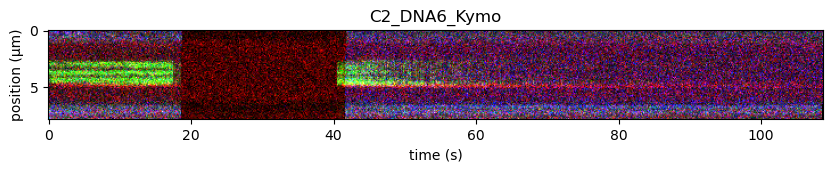

In [170]:
f = plt.figure()
f.set_figwidth(10)
f.set_figheight(8)
kymo_new = kymo["0s":"160s"].plot("rgb", adjustment=lk.ColorAdjustment(0, 99, mode="percentile"))
plt.show()

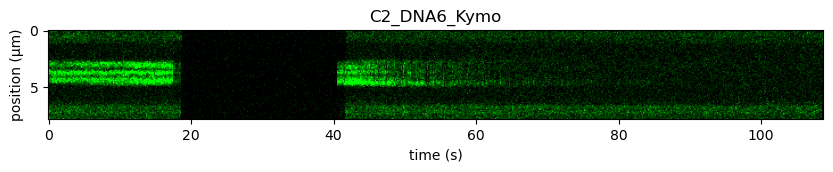

In [171]:
f = plt.figure()
f.set_figwidth(10)
f.set_figheight(8)
kymo_new = kymo["0s":"160s"].plot("g", adjustment=lk.ColorAdjustment(0, 99, mode="percentile"))
plt.show()

In [172]:
background = kymo["50s":"60s"].crop_by_distance(5.4, 5.6)
green_background_per_pixel = np.sum(background.get_image("green"))

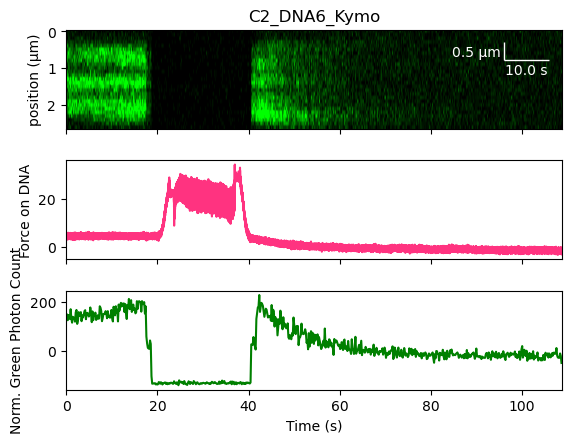

In [180]:
# Calculate background-subtracted photon count
background_subtracted_photon_count = file["Photon count"]["Green"].downsampled_over(kymo.line_timestamp_ranges(), reduce=np.sum) - green_background_per_pixel

# Plot the background-subtracted photon count
kymo.crop_by_distance(2.4, 5.0).plot_with_channels(
    [
        file.force2x.downsampled_by(100),
        background_subtracted_photon_count,
    ],
    "g",
    adjustment=lk.ColorAdjustment(0, 98, "percentile"),
    aspect_ratio=0.2,
    title_vertical=True,
    scale_bar=lk.ScaleBar(10.0, 0.5),
    colors=[[1.0, 0.2, 0.5], "green"],
    labels=["Force on DNA", "Norm. Green Photon Count"],
)

time_counts =background_subtracted_photon_count.timestamps
time_counts = (time_counts - time_counts[0]) *1e-9
photon_counts=background_subtracted_photon_count.data
counts= np.vstack((time_counts,photon_counts)).T
np.savetxt('C2_DNA6_Green_counts.csv',counts, delimiter=',', header='time counts')
#plt.savefig('DNA6_Condition2_GreenCount.png')

In [164]:
###########################################################End